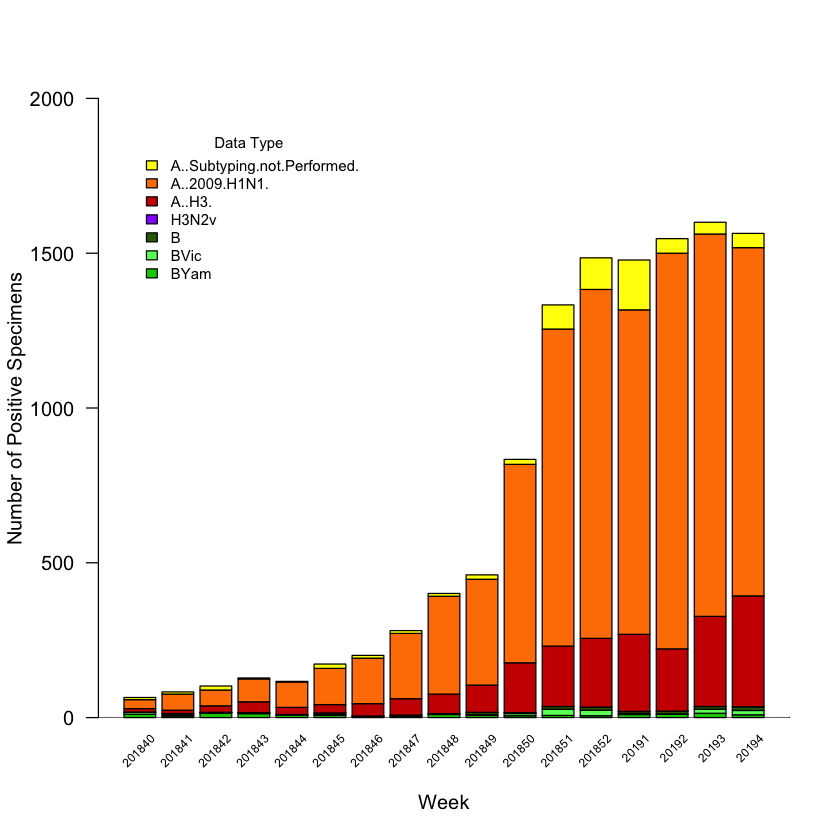

In [249]:
ptests<-read.csv("WHO_NREVSS_Public_Health_Labs.csv", skip = 1)
ptestsR <- ptests[1:17, c(1,2,3,4,5,11,10,9,12,7,6,8)]
year <- ptestsR[,3]
weeks <- ptestsR[,4]
weekLabel <- paste0(year, weeks)
colors <- c("#00CC00", "#66FF66", "#336600", "#9933FF", "#CC0000", "#FF8000", "#FFFF00")

plt <- barplot(as.matrix(as.data.frame(t(ptestsR[,6:12]))),beside=F,xlab="Week", ylab="Number of Positive Specimens", las=2, xaxt="n",ylim=c(0,2000),col=colors,axis.lty="solid")
legend("topleft",inset=c(0.05,0.05),rownames(t(ptestsR[12:6])),fill=rev(colors),title="Data Type", cex = 0.75, box.lty=0)
axis(1, at=weekLabel, labels = weekLabel, pos=1)
text(plt, par("usr")[3], srt = 45, labels= weekLabel,adj = c(1.1,3.1), xpd = TRUE, cex=0.6)
abline(h=0)

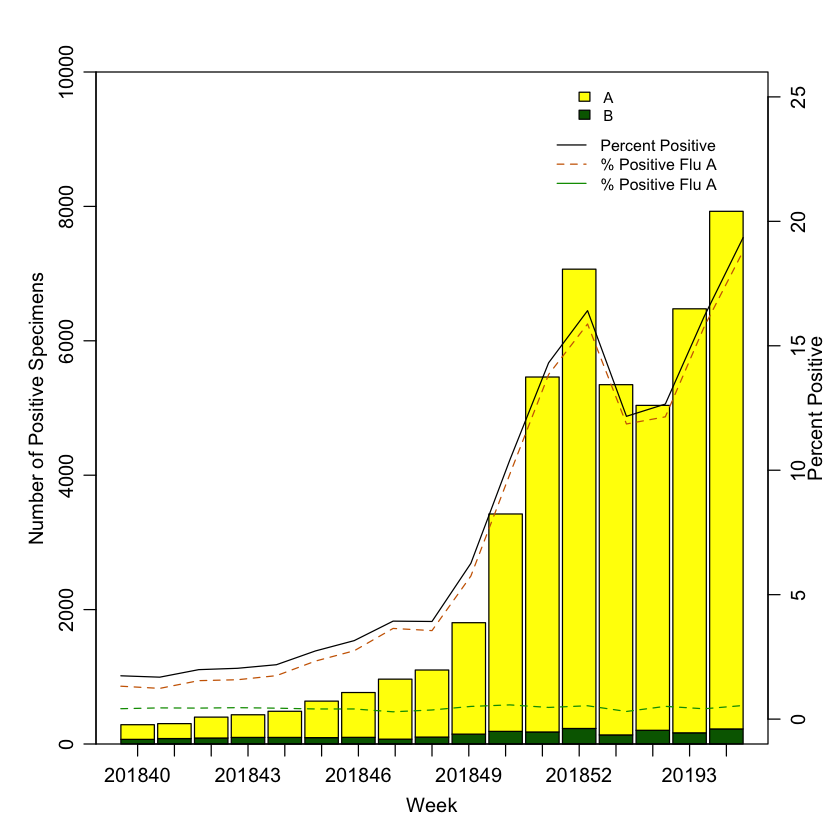

In [244]:

natSumm<-read.csv("WHO_NREVSS_Clinical_Labs.csv", skip = 1)
natSumm <- natSumm[1:17,]
colors <- c("darkgreen", "yellow")
year <- natSumm[,3]
weeks <- natSumm[,4]
weekLabel <- paste0(year, weeks)
posPerc <- natSumm[,8]
posAPerc <- natSumm[,9]
posBPerc <- natSumm[,10]
lineLegend <- c("Percent Positive", "% Positive Flu A", "% Positive Flu A")

par(mar=c(4, 4, 3, 3), mgp=c(2, 0.75, 0))
plt <- barplot(as.matrix(as.data.frame(t(natSumm[,7:6]))), beside=F, xlab="Week", ylab="Number of Positive Specimens", ylim=c(0,10000), names.arg=weekLabel, col=colors,axis.lty="solid", space=0.1)
par(new=TRUE)
plot(plt, posPerc, type="l", col="black", ylim=c(0,25), lwd=1, xlab="", ylab="", xaxt = "n", yaxt = "n")
lines(plt, posAPerc, type = "l", col = "#CC6600", lty=2)
lines(plt, posBPerc, type = "l", col = "#009900", lty=2)
axis(4)
mtext("Percent Positive", side = 4, line = 1.45)
legend("topright",inset=c(0.22,0.01) ,legend=c("A","B"),fill=rev(colors), cex = 0.75, box.lty=0, pt.cex = 0.5)
legend("topright",inset=c(0.06,0.08),legend=lineLegend, col=c("black", "#CC6600", "#009900"), lty=1:2, cex=0.8, box.lty=0)



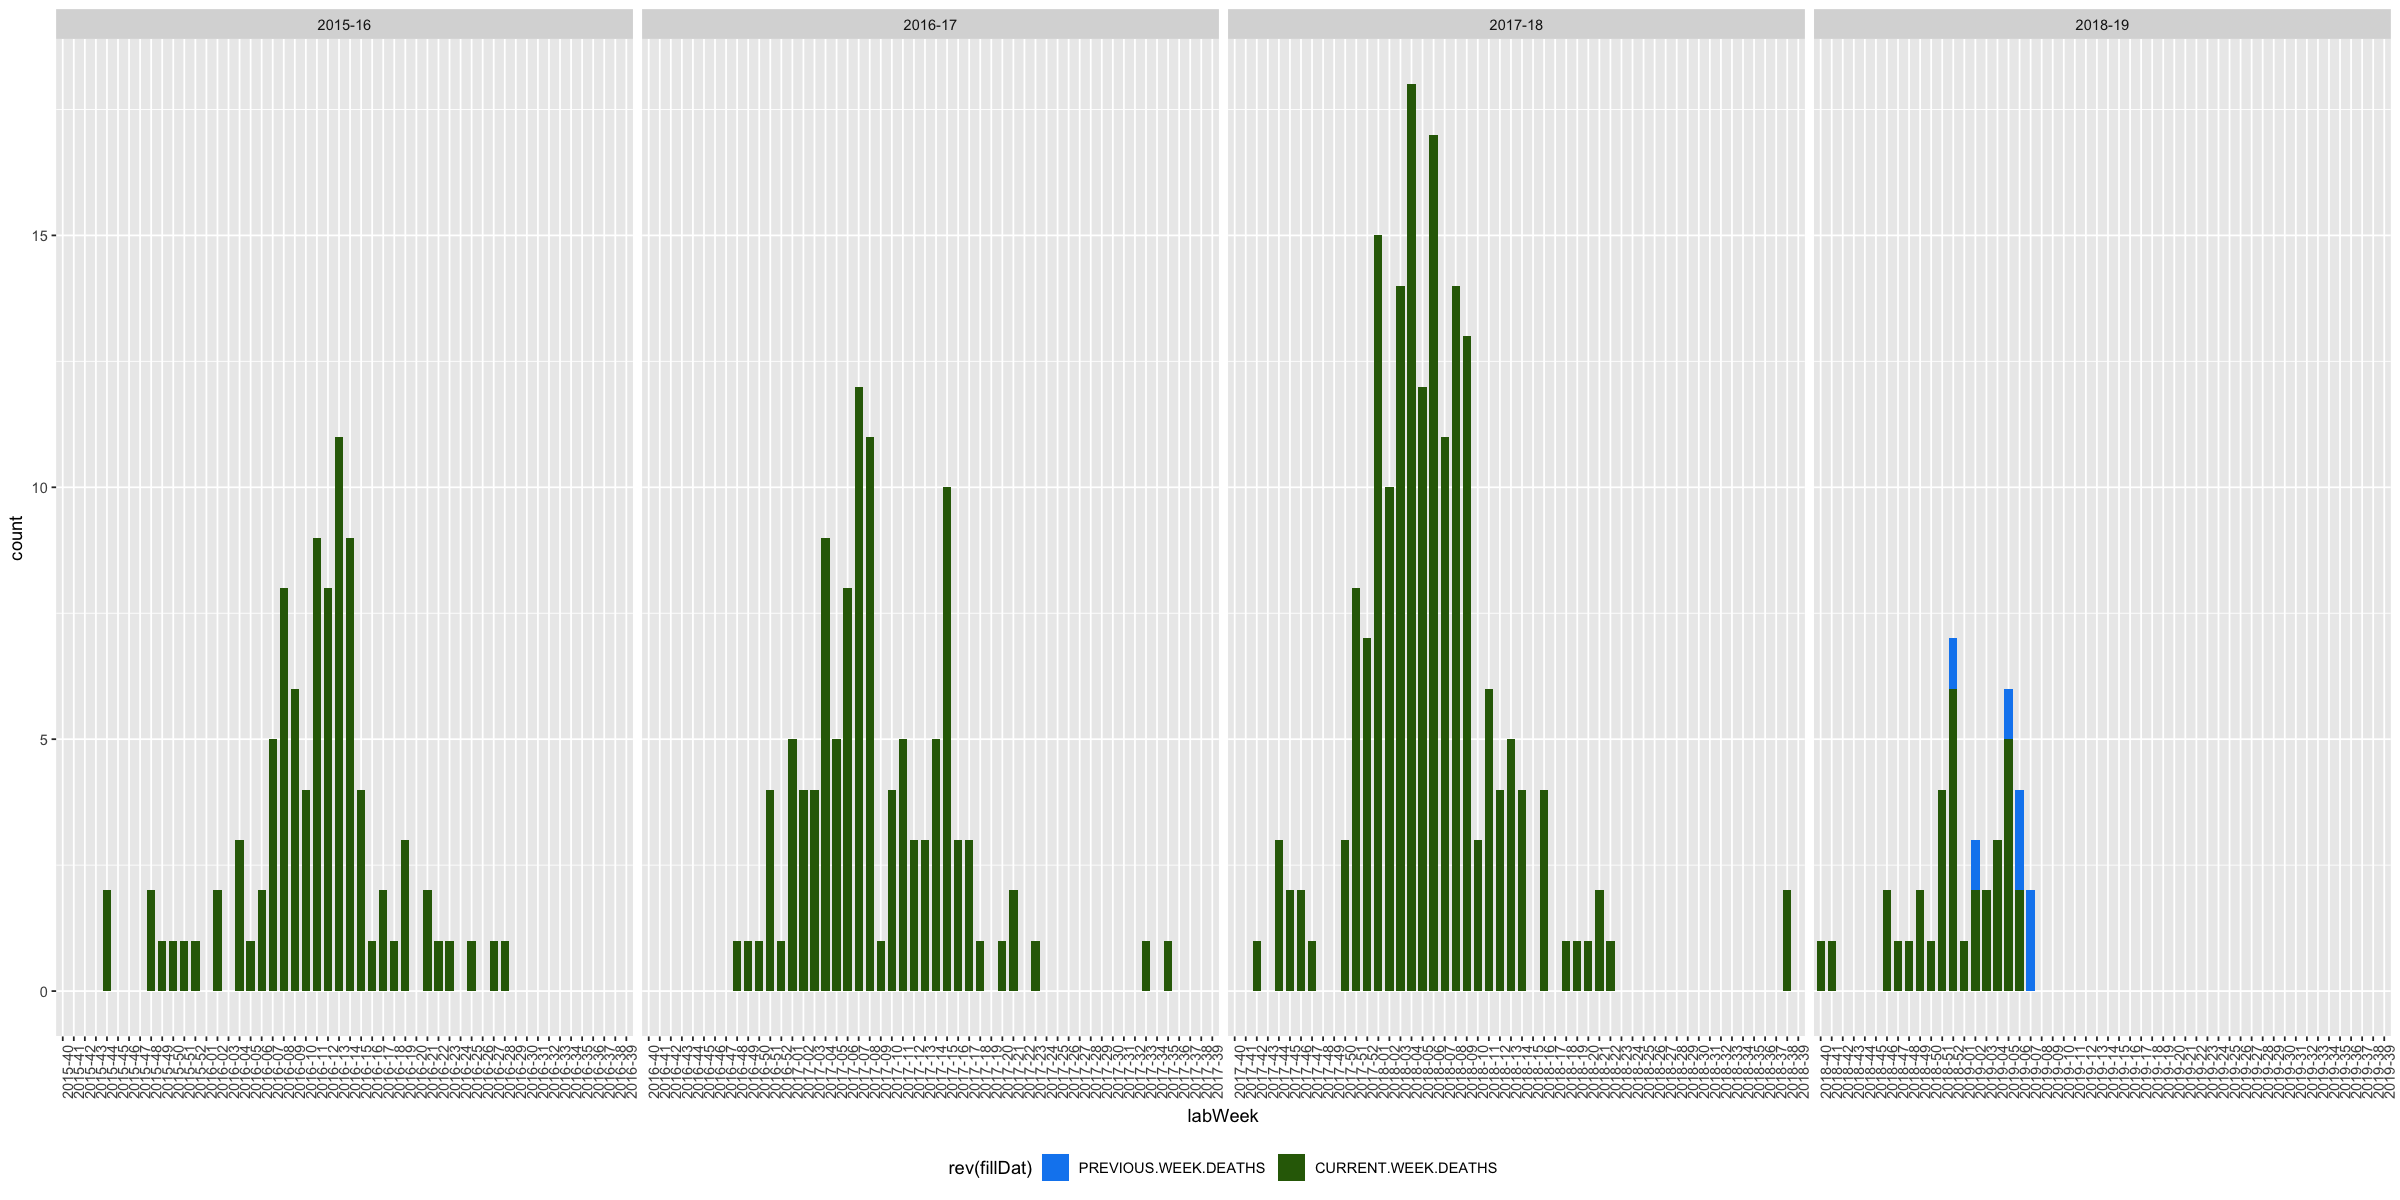

In [395]:
library(ggplot2)
library(plyr)
library(stringr)

weeklyDat <- read.csv("Weekly.csv", skip = 1)

library(reshape2)
weeklyDat <- melt(weeklyDat, id=c("SEASON","WEEK.NUMBER","NO..OF.DEATHS"))
weeklyDat <- plyr::rename(weeklyDat, c("SEASON"="season", "WEEK.NUMBER"="week", "NO..OF.DEATHS"="death", "variable"="fillDat", "value"="count"))

# weeklyDat$weekNew <- str_split_fixed(as.character(weeklyDat[,2]), "-", 2)[,2]
labWeek <- weeklyDat$week

# weeklyDat <- with(weeklyDat, weeklyDat[order(season, fillDat, week),])
p <- ggplot(data=weeklyDat, aes(x=labWeek, y=count, fill=rev(fillDat), width=.75)) + 
  geom_bar(stat="identity") + 
  facet_grid(~ season, scales="free_x")+
  scale_fill_manual(values = c("#0e88f0", "#2f6806"))

p + theme(legend.position="bottom", axis.text.x = element_text(angle = 90, hjust = 1))
